<a href="https://colab.research.google.com/github/jxxngho/HG_MLDL/blob/main/08_3_Visualization_of_Synthetic_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가중치 시각화

In [88]:
# 합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징 학습

from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

# 케라스 모델에 추가한 층은 layers 속성에 저장되어 있음.
model.layers

In [82]:
# 첫번째 합성곱 층의 가중치 조사
# 층의 가중치와 절편은 층의 weights 속성에 저장 /
conv = model.layers[0] # Conv2D객체

print(conv.weights[0].shape, conv.weights[1].shape)

#  첫번째 원소(가중치)와 두번째 원소 (절편)

(3, 3, 1, 32) (32,)


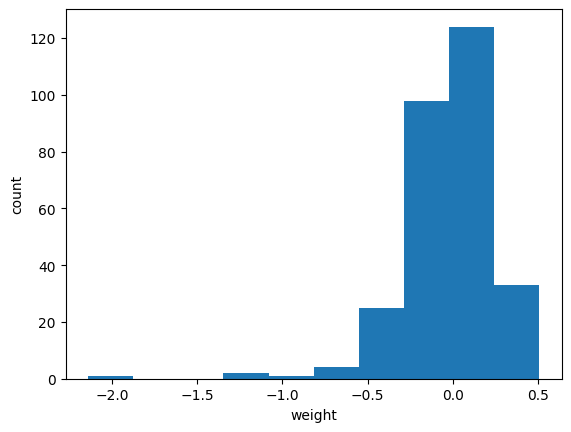

In [83]:
# 커널의 크기가 (3,3) + 깊이1 + 필터개수 32개 -->(3,3,1,32)
# 절편은 필터개수와 동일

# 시각화
conv_weights = conv.weights[0].numpy()
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1)) # 열 벡터로 만든다.
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 대부분 0  , 이건 입력데이터와 곱해도 0 --> 별 의미없는 부분
# -크거나 + 큰 경우는 어떤 부분을 감지하려고

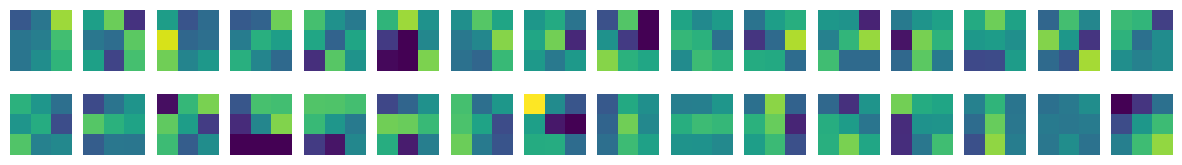

In [93]:
# 커널 출력
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

# imshow() 함수는 배열의 최댓값과 최솟값을 사용해 픽셀의 강도를 표현함.
# 2개 이상의 이미지를 구분하려면 최댓값과 최솟값을 지정해야 비교하기 수월함.

In [85]:
# 빈 합성곱 신경망은 밋밋한 가중치
# 맨 처음 가중치는 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택해서 밋밋하게 나타남.

# 함수형 API

In [96]:
# 지금까지는 신경망 모델을 만들 때 Sequential 클래스를 사용
# 근데 입력이 두개거나 출력이 두개일 때는 Sequential를 못써요 .. 대신 함수형API사용

# 함수형 API는 케라스의 Model클래스를 사용해서 모델을 만듦

dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

# 이렇게 함수처럼 호출도 할 수있데? ㅇ0ㅇ
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs) # inputs은 input layer객체

# 위 코드를 실행하면 입력값 inputs를 Dense 층에 통과시킨 후 출력값 hidden을 만들어 줌

In [87]:
# 두번째 층 호출 : 이 때는 첫번째 층의 출력을 입력으로 사용
outputs = dense2(hidden)

# 그 다음 inputs 와 outputs을 Model클래스로 연결해주면됨

model = keras.Model(inputs, outputs)

# Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출하지만
# Model 클래스에서는 우리가 수동으로 만들어서 호출해야함.
# 바로 inputs가 InputLayer 클래스의 출력값이 되어야 함.

## 함수형API가 필요한 이유

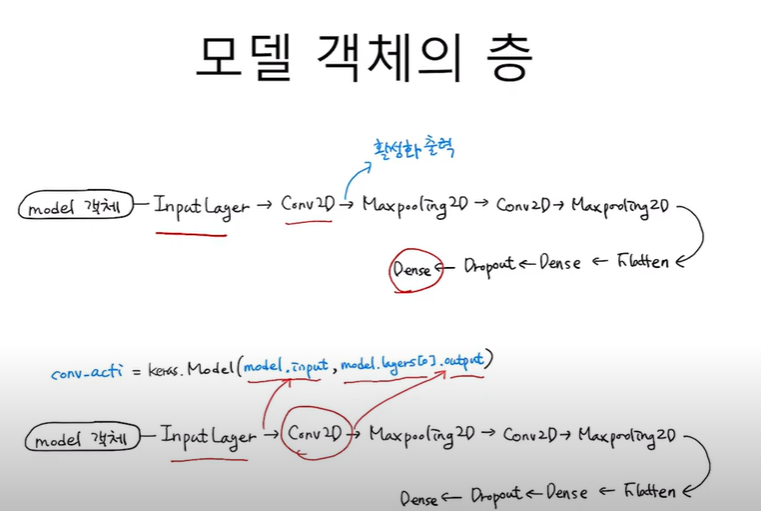

In [97]:
# 만약 Conv2D층이 출력한 특성 맵을 얻고 싶다면?

conv_acti = keras.models.Model(model.input, model.layers[0].output)
conv_acti.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 특성맵 시각화

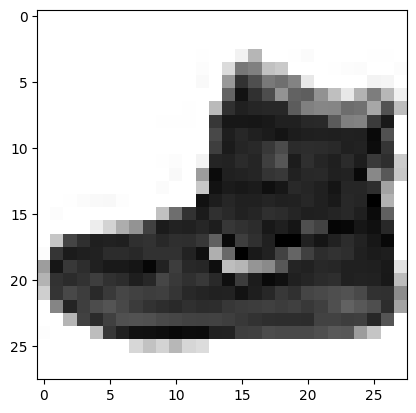

In [98]:
# 훈련 세트의 첫번쨰 샘플 그리기

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [99]:
# 이 샘플을 conv_acti 모델에 주입하여 Conv2D층이 만드는 특성 맵을 출력해보자~!
# predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것을 기대
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0

feature_maps = conv_acti.predict(inputs)

# 크기 확인
print(feature_maps.shape)

1/1 [==============================] - 0s 41ms/step
(1, 28, 28, 32)


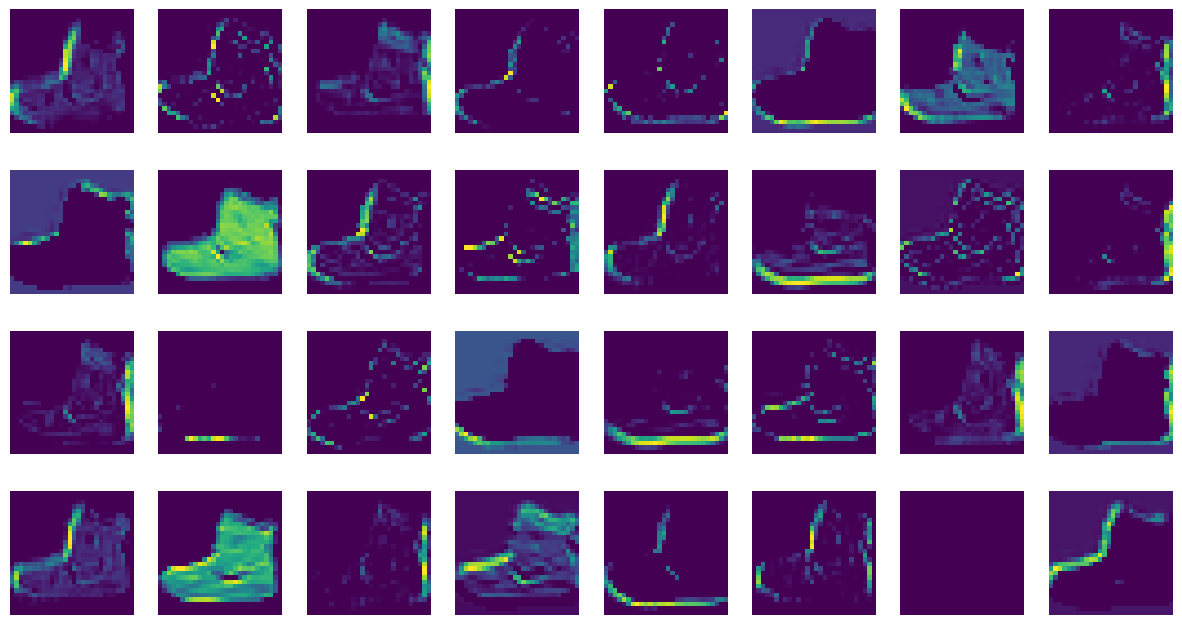

In [100]:
fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
# 첫번째 필터는 오른쪽에 있는 수직선 의미, 첫 번째 특성 맵은 이 필터가 감지한 수직선이 강하게 활성화

In [101]:
# 두 번째 합성곱 층이 만든 특성 맵도 확인 가능

conv2_acti = keras.models.Model(model.input, model.layers[2].output)

inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 39ms/step


In [103]:
# 풀링층을 지나서 가로 세로 크기가 줄어들었을 것
feature_maps.shape

(1, 14, 14, 64)

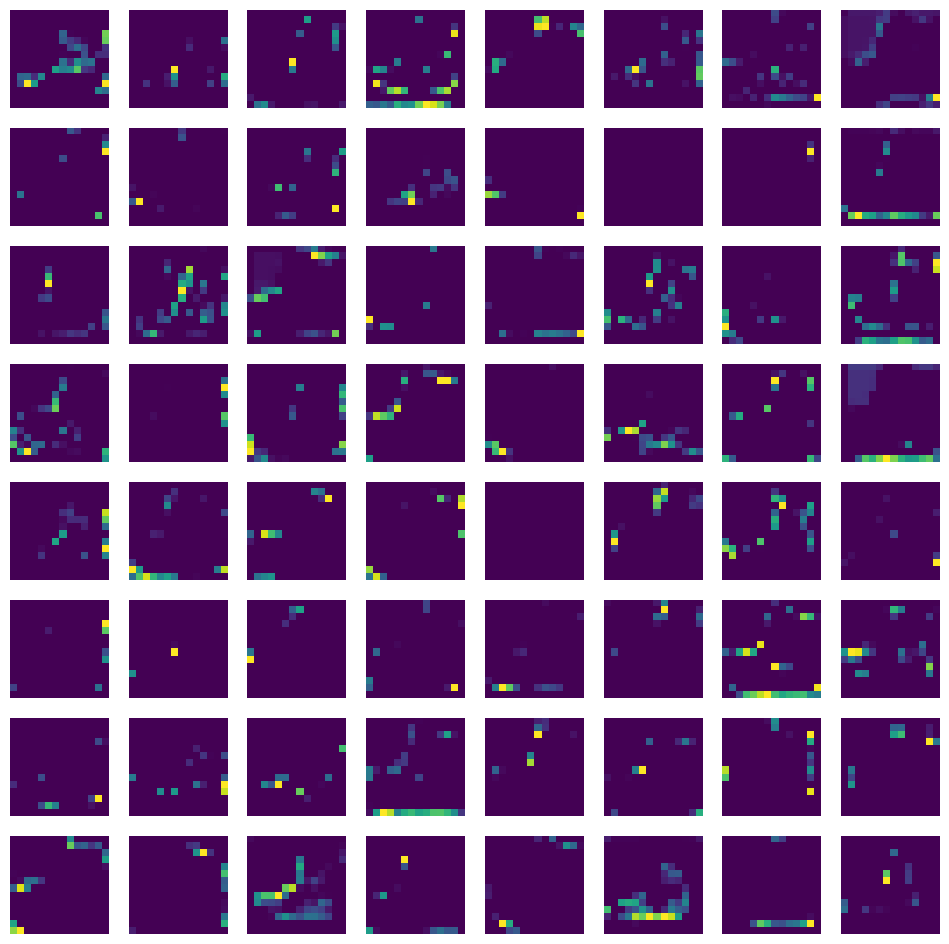

In [104]:
# 두번째 합성곱 층이 만든 특성맵

fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
# 낮은 층일수록 저수준이라서 단순한 모양, 특징 추출
# 층이 깊어질수록 고수준 특성 학습, 추상적인 모양

# --> 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고
# 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각저인 정보를 바탕으로 추상적인 정보를 학습한다!